Module Title: Deep Learning

Module Code: CS4S772

Module Leader/Tutor: Dr Mabrouka Abuhmida

Student Name: Salma Javid

Enrollment ID: 30107961

# #1. Introduction
**The Problem Statement:**
1. Develop a deep learning model capable of predicting age (of a person) from an image (an RGB picture).
2. Deploy the model using Anvil's web interface.

#— Importing libraries
Let's import the required libraries.

Please Note: We will do this as and when required.

In [ ]:
import io #for streaming data (input and output)
import os #for operating system-related functionality
import numpy as np #for numerical operations
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #to visualize data via plots, charts, etc.
from google.colab import files #for uploading and downloading files
import zipfile #for creating, reading, writing and extracting ZIP files
from tqdm import tqdm #for displaying progress bars
from PIL import Image #Python Imaging Library for working with images
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.preprocessing import LabelEncoder #for encoding labels
from IPython.display import display, Image #for displaying images

#— Extracting Zipped Files

In [ ]:
#Script to upload the zipped file named 'data.zip' containing the 'Train' folder with image dataset and the CSV file with IDs and Labels
uploaded_zip_file = files.upload()

zip_file_name = list(uploaded_zip_file.keys())[0]

#Extracting contents of the zip file
with zipfile.ZipFile(io.BytesIO(uploaded_zip_file[zip_file_name]), 'r') as zip_ref:
    zip_ref.extractall()

#Displaying the list of extracted files and folders
extracted_files = os.listdir()
print("Here's the list of extracted files and folders:", extracted_files)

#Loading the CSV file into a DataFrame
csv_file_name = 'train.csv'
image_dataset = pd.read_csv('/content/train.csv')



Saving data.zip to data.zip
Here's the list of extracted files and folders: ['.config', 'train.csv', 'data.zip', 'Train', 'sample_data']


# #2. Dataset Inspection

# — Displaying the DataFrame

In [ ]:
#Display the first 7 rows of the DataFrame
display(image_dataset.head(7))

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG


#— Displaying Images with ID & Class

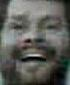

Image ID: 377.jpg, Class: MIDDLE


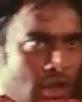

Image ID: 17814.jpg, Class: YOUNG


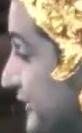

Image ID: 21283.jpg, Class: MIDDLE


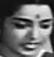

Image ID: 16496.jpg, Class: YOUNG


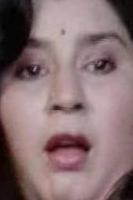

Image ID: 4487.jpg, Class: MIDDLE


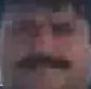

Image ID: 6283.jpg, Class: MIDDLE


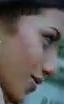

Image ID: 23495.jpg, Class: YOUNG


In [ ]:
#Displaying the first 7 images with their corresponding IDs and classes
for i in range(7):
    image_id = image_dataset.iloc[i]['ID']
    image_class = image_dataset.iloc[i]['Class']
    image_path = f'Train/{image_id}'
    image = Image(filename=image_path, format='jpeg')
    display(image)
    print(f"Image ID: {image_id}, Class: {image_class}")


They're all of different shapes and sizes and colors as well.

In [ ]:
image_dataset.shape #Shows the shape of DataFrame — In this case 19,906 rows and 2 columns

(19906, 2)

In [ ]:
len(image_dataset.columns) #Shows length of columns in the CSV File — In this case 2 as our CSV has only 2 columns (ID & Class)

2

In [ ]:
image_dataset.columns #Shows the name of columns in the CSV File — as mentioned above

Index(['ID', 'Class'], dtype='object')

In [ ]:
len(image_dataset) #Shows the lenght count/number of rows/records

19906

In [ ]:
image_dataset.size #Shows the total count of the rows + columns in the DataFrame

39812

In [ ]:
image_dataset.describe() #Describes the dataset in terms ofunique Columns, classes, etc.

,ID,Class
count,19906,19906
unique,19906,3
top,377.jpg,MIDDLE
freq,1,10804


In [ ]:
image_dataset.info() #Displays the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19906 entries, 0 to 19905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      19906 non-null  object
 1   Class   19906 non-null  object
dtypes: object(2)
memory usage: 311.2+ KB


In [ ]:
#Let's see the unique values in the 'Class' column
unique_classes = image_dataset['Class'].unique()
print("Unique Classes:", unique_classes)


Unique Classes: ['MIDDLE' 'YOUNG' 'OLD']


# #3. Data Visualization
Let's visualize our DataFrame via charts now. It provides a comprehensive overview and helps in analysis as well.

#— Pie Chart

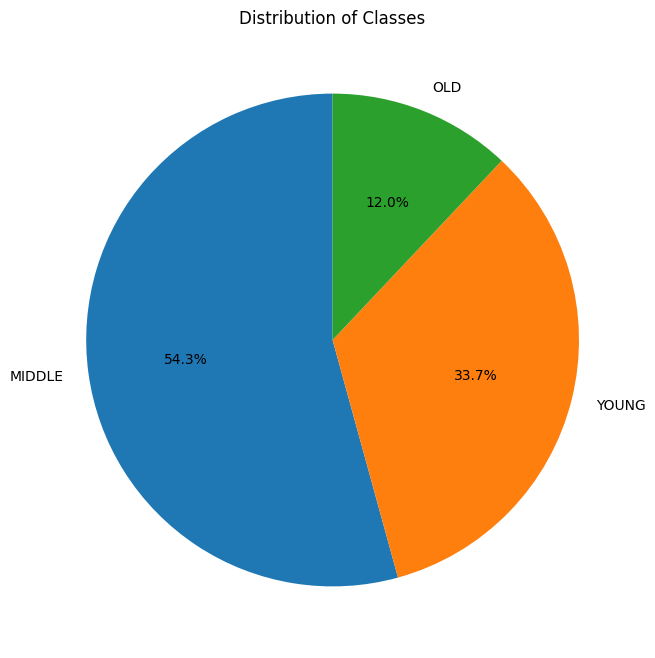

In [ ]:
#Let's plot a Pie Chart displaying all class/Age Groups: Young, Middle, Old
class_counts = image_dataset['Class'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.show()


The Middle age group (or class) represented in Blue is the largest group with approximately 54.3% of the dataset. The Young group represented in Orange color makes up around 33.7% of the dataset. While the oldies (represented in Green) are the smallest set, accounting for only 12% of the dataset.

#— Box Plot
To see the summary statistics of age distribution, including median, quartiles, and potential outliers.

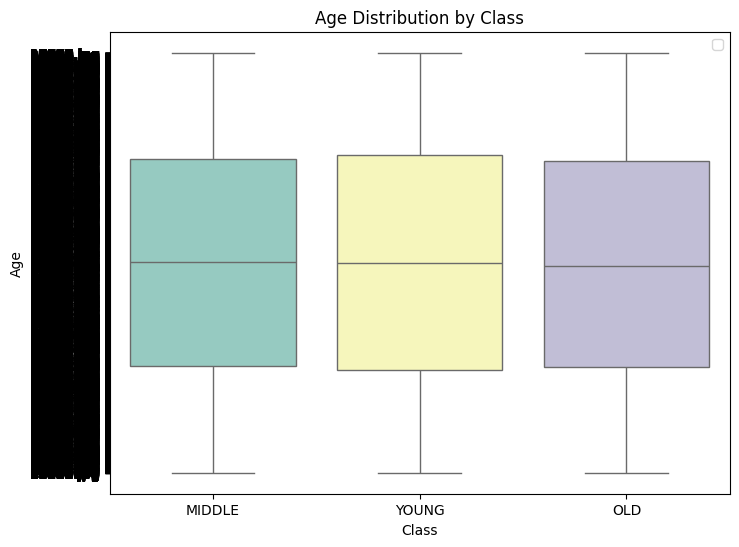

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='ID', data=image_dataset, hue='Class', palette='Set3', showfliers=True)

plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.legend()
plt.show()


#— Bar Chart
Now let's display all class counts through a bar chart.

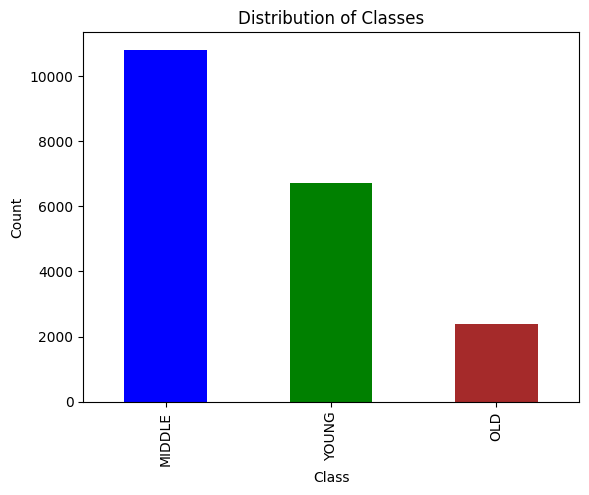

In [ ]:
# Defining colors for classes
class_colors = {'young': 'blue', 'middle': 'green', 'old': 'brown'}

# Now creating a bar chart
class_counts = image_dataset['Class'].value_counts()

# Specifying colors directly
colors = ['blue', 'green', 'brown']

class_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**We have:**

Middle: 10804

Young: 6706

Old: 2396


# #4. Data Preprocessing

#— Converting all images to RGB
The given image dataset is a mix of RGB and Grayscale. Let's convert all of them to RGB... that's the ask!

In [ ]:
# Loading and preprocessing images
image_data = []
labels = []

from PIL import Image as PILImage  # Importing the Image class

# Iterating over rows in the CSV file
for index, row in tqdm(image_dataset.iterrows(), total=len(image_dataset)):
    image_path = os.path.join('Train', row['ID'])

    # Opening image to handle RGB and grayscale cases
    img_pil = PILImage.open(image_path)

    # Converting all grayscale images to RGB
    if img_pil.mode == 'L':
        img_pil = img_pil.convert('RGB')

    # Convert images to NumPy array
    img_array = np.array(img_pil)

    # Appending the image and label to the lists
    image_data.append(img_array)
    labels.append(row['Class'])




100%|██████████| 19906/19906 [00:09<00:00, 2090.64it/s]


Let's check if all our images are now coverted to RGB

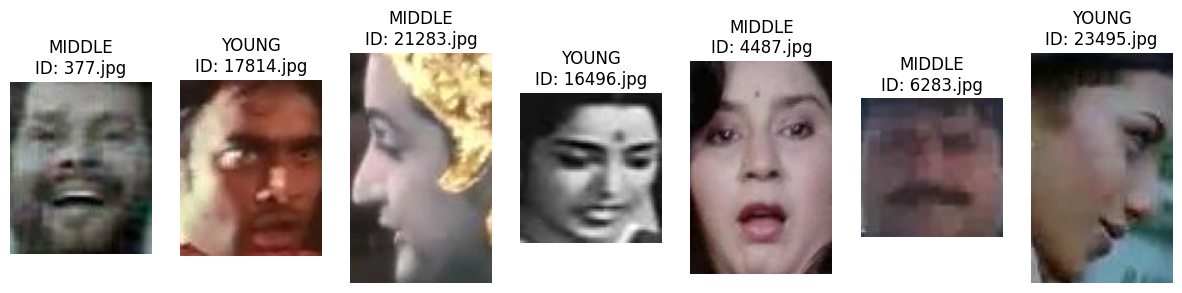

In [ ]:
import matplotlib.pyplot as plt

# Displaying the first 7 images with Image ID and labels
plt.figure(figsize=(15, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(image_data[i])
    plt.title(f"{labels[i]}\nID: {image_dataset.iloc[i]['ID']}")
    plt.axis('off')

plt.show()


# — Label encoding

In [ ]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


Testing if it worked, or not!

In [ ]:
# Adding a new column 'ClassEncoded' to the DataFrame
image_dataset['ClassEncoded'] = labels_encoded
print(image_dataset[['ID', 'Class', 'ClassEncoded']].head())

          ID   Class  ClassEncoded
0    377.jpg  MIDDLE             0
1  17814.jpg   YOUNG             2
2  21283.jpg  MIDDLE             0
3  16496.jpg   YOUNG             2
4   4487.jpg  MIDDLE             0


**It worked!**
* Middle is encoded as 0
* Young is encoded as 2
* Old is encoded as 1

#— Splitting the Dataset
I’m splitting my dataset into training and testing sets to evaluate the model's performance — Ratio: 70:30.

70% training and 30% testing set


In [ ]:
# Splitting the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels_encoded, test_size=0.3, random_state=33, stratify=labels_encoded
)

# Displaying the number of training and testing set images
print(f"\nNumber of training images: {len(train_images)}")
print(f"\nNumber of testing images: {len(test_images)}")


Number of training images: 13934

Number of testing images: 5972


In [ ]:
# Displaying the distribution of classes in training set
unique_train_labels, counts_train_labels = np.unique(train_labels, return_counts=True)
print("\nDistribution of classes in the training set:")
for label, count in zip(unique_train_labels, counts_train_labels):
    print(f"Class {label}: {count} images")

# Displaying the distribution of classes in testing set
unique_test_labels, counts_test_labels = np.unique(test_labels, return_counts=True)
print("\nDistribution of classes in the testing set:")
for label, count in zip(unique_test_labels, counts_test_labels):
    print(f"Class {label}: {count} images")


Distribution of classes in the training set:
Class 0: 7563 images
Class 1: 1677 images
Class 2: 4694 images

Distribution of classes in the testing set:
Class 0: 3241 images
Class 1: 719 images
Class 2: 2012 images


#— Resize and Rescale



In [ ]:
#Loading and preprocessing images
image_data = []
labels = []

#Resizing and rescaling
target_size = (64, 64)  #Using a small size for quicker results
rescale_factor = 1.0 / 255.0  #Rescaling pixel values to the range [0, 1]

from PIL import Image as PILImage  #Importing the Image class

#Iterating over rows in the CSV file
for index, row in tqdm(image_dataset.iterrows(), total=len(image_dataset)):
    image_path = os.path.join('Train', row['ID'])

    #Opening image to handle RGB and grayscale cases
    img_pil = PILImage.open(image_path)

    #Convert grayscale images to RGB
    if img_pil.mode == 'L':
        img_pil = img_pil.convert('RGB')

    #Resize the image
    img_pil = img_pil.resize(target_size)

    #Converting the image to a NumPy array and rescale pixel values
    img_array = np.array(img_pil) * rescale_factor

    image_data.append(img_array)
    labels.append(row['Class'])

100%|██████████| 19906/19906 [00:19<00:00, 1040.30it/s]


**Displaying images again after resizing & rescaling to see the difference**

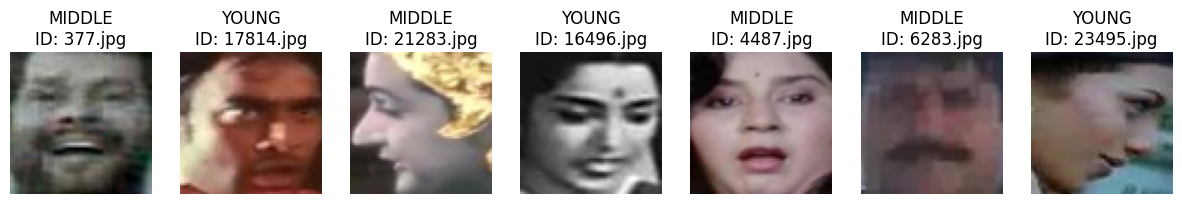

In [ ]:
import matplotlib.pyplot as plt

#Display the first 7 images with Image ID and labels
plt.figure(figsize=(15, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(image_data[i])
    plt.title(f"{labels[i]}\nID: {image_dataset.iloc[i]['ID']}")
    plt.axis('off')

plt.show()


**Success!** Resizing and rescaling of images is clearly visible now.

In [ ]:
print(len(train_images), len(train_labels))
print(len(test_images), len(test_labels))


15924 15924
3982 3982


In [ ]:
from PIL import Image
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

image_data = []
labels = []

for index, row in tqdm(image_dataset.iterrows(), total=len(image_dataset)):
    image_path = os.path.join('Train', row['ID'])

    # Opening image to handle RGB and grayscale cases
    img_pil = Image.open(image_path)

    # Finding and converting all grayscale images to RGB
    if img_pil.mode == 'L':
        img_pil = img_pil.convert('RGB')

    # Resizing all image to a similar small size
    img_pil = img_pil.resize((64, 64))

    # Converting the image to a NumPy array
    img_array = np.array(img_pil)

    # Appending the image and label to the lists
    image_data.append(img_array)
    labels.append(row['Class'])

# Label Encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels_encoded, test_size=0.3, random_state=33, stratify=labels_encoded
)

# Displaying the number of training and testing set images
print(f"\nNumber of training images: {len(train_images)}")
print(f"\nNumber of testing images: {len(test_images)}")


100%|██████████| 19906/19906 [00:13<00:00, 1442.02it/s]



Number of training images: 13934

Number of testing images: 5972


# #5. Baseline CNN Training on Unaugmented Dataset
Training the CNN Model with Original Data. This is the starting point. Lot's to do yet!

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

num_classes = 3

# Defining my CNN model
model = models.Sequential()

# The Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output for the fully connected layers
model.add(layers.Flatten())

# The Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Adding dropout for regularization
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Displaying model summary
model.summary()

# Training the model
history = model.fit(np.array(train_images), np.array(train_labels), epochs=7, validation_data=(np.array(test_images), np.array(test_labels)))

# Printing training and testing accuracy
train_accuracy = model.evaluate(np.array(train_images), np.array(train_labels), verbose=0)[1]
test_accuracy = model.evaluate(np.array(test_images), np.array(test_labels), verbose=0)[1]

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

Results:
The accuracy values will give us the insights into how well the model is performing on both the training and testing datasets.

* Training Accuracy: 77.57%
* Testing Accuracy: 67.78%

**hmmm... not very impressive!**




# #6. Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Using ImageDataGenerator method for Image augmentation
datagen = ImageDataGenerator(
    rotation_range=90,      # Degree of rotation
    width_shift_range=0.3,  # Fraction of total width for horizontal shifts
    height_shift_range=0.3, # Fraction of total height for vertical shifts
    shear_range=0.3,        # Shear intensity
    zoom_range=0.3,         # Range for random zoom
    horizontal_flip=True,   # Randomly flipping images horizontally
    vertical_flip=True,     # Randomly flipping images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

#Initializing an empty list to store augmented images and their corresponding labels
augmented_data = []

#Iterating over the original images and applying data augmentation
for image, label in zip(train_images, train_labels):
    image = image.reshape((1,) + image.shape)  #Adding an extra dimension for batch size
    label = label.reshape((1,))
    for augmented_image, augmented_label in datagen.flow(image, label, batch_size=1):
        augmented_data.append((augmented_image[0], augmented_label[0].astype(int)))
        break  # To generate only one augmented image per original image to avoid an infinite loop


# #7. Convolutional Neural Network (CNN) on Augmented Dataset

In [ ]:
#Lemme train my model on aumgented dataset now.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Defining my CNN model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#Compiling the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Displaying the model summary
model.summary()

history = model.fit(
    datagen.flow(np.array(train_images), train_labels, batch_size=32),
    steps_per_epoch=len(train_images) // 32,
    epochs=7,
    validation_data=(np.array(test_images), test_labels),
    verbose=1
)

#Printing training and testing accuracy
train_accuracy = model.evaluate(np.array(train_images), np.array(train_labels), verbose=0)[1]
test_accuracy = model.evaluate(np.array(test_images), np.array(test_labels), verbose=0)[1]

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

#Let's save the trained model for predictions later
model.save('/content/age_prediction_model.h5')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 128)        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Result:**

* Training Accuracy: 57.22%
* Testing Accuracy: 57.80%

**Not very good! Maybe I need to experiment with more number of epochs... Let's test with 33.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Defining my CNN model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#Compiling the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Displaying the model summary
model.summary()

history = model.fit(
    datagen.flow(np.array(train_images), train_labels, batch_size=32),
    steps_per_epoch=len(train_images) // 32,
    epochs=33,
    validation_data=(np.array(test_images), test_labels),
    verbose=1
)

#Printing training and testing accuracy
train_accuracy = model.evaluate(np.array(train_images), np.array(train_labels), verbose=0)[1]
test_accuracy = model.evaluate(np.array(test_images), np.array(test_labels), verbose=0)[1]

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

#Let's Save the trained model for predictions later
model.save('/content/age_prediction_model.h5')



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 128)        

**Very disappointing! Let's try once again... with Grayscale images this time. #TimeToExperiment**

# #8. Converting all images to GrayScale

In [ ]:
# Loading and preprocessing images
images = []
labels = []

# Resizing and rescaling
target_size = (64, 64)
rescale_factor = 1.0 / 255.0

# Folder for grayscale images
grayscale_folder = 'grayscale_images'
os.makedirs(grayscale_folder, exist_ok=True)

# Iterating over rows in the CSV file
for index, row in tqdm(image_dataset.iterrows(), total=len(image_dataset)):
    image_path = os.path.join('Train', row['ID'])

    # Opening image to handle RGB and grayscale cases
    img = PILImage.open(image_path)

    # Check if the image is color
    if img.mode != 'L':
        # Convert to grayscale
        grayscale_img = img.convert('L')

        # Saving the grayscale image to the new directory
        grayscale_img.save(os.path.join(grayscale_folder, f'{row["ID"]}_gs.jpg'))

        # Resize the grayscale image
        img = grayscale_img.resize(target_size)
    else:
        # Resize the grayscale image
        img = img.resize(target_size)

    # Converting the image to a NumPy array and rescale pixel values
    img_array = np.array(img) * rescale_factor

    images.append(img_array)
    labels.append(row['Class'])

# Converting labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Splitting the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels_encoded, test_size=0.3, random_state=33, stratify=labels_encoded
)

# Displaying the number of training and testing set images
print(f"\nNumber of training images: {len(train_images)}")
print(f"\nNumber of testing images: {len(test_images)}")


100%|██████████| 19906/19906 [00:21<00:00, 922.08it/s]


Number of training images: 13934

Number of testing images: 5972


— Grayscale Images... let's see 'em.

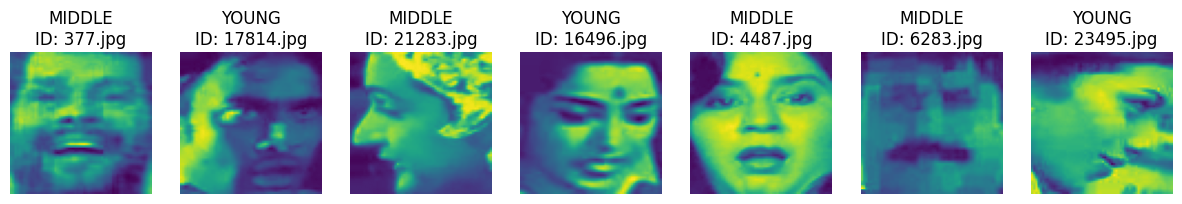

In [ ]:
import matplotlib.pyplot as plt

#Display the first 7 grayscaled images with their Image IDs and labels
plt.figure(figsize=(15, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(images[i])
    plt.title(f"{labels[i]}\nID: {image_dataset.iloc[i]['ID']}")
    plt.axis('off')

plt.show()

# — Testing CNN Model on Grayscale Images

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Converting train_images and test_images to NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)

# Reshaping images to add the batch dimension
train_images_reshaped = train_images_array.reshape((-1, 64, 64, 1))
test_images_reshaped = test_images_array.reshape((-1, 64, 64, 1))

print("Shape before reshaping:", train_images_array.shape)
print("Shape after reshaping:", train_images_reshaped.shape)

# Defining the CNN model for grayscale images
model_grayscale = Sequential()

# Convolutional layers
model_grayscale.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_grayscale.add(MaxPooling2D((2, 2)))
model_grayscale.add(Conv2D(64, (3, 3), activation='relu'))
model_grayscale.add(MaxPooling2D((2, 2)))
model_grayscale.add(Conv2D(128, (3, 3), activation='relu'))
model_grayscale.add(MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model_grayscale.add(Flatten())
model_grayscale.add(Dense(256, activation='relu'))
model_grayscale.add(Dropout(0.5))
model_grayscale.add(Dense(3, activation='softmax'))

# Compiling the model
model_grayscale.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Displaying a summary of the model
model_grayscale.summary()

# Training the model using the ImageDataGenerator for data augmentation
history_grayscale = model_grayscale.fit(
    datagen.flow(train_images_reshaped, train_labels, batch_size=32),
    steps_per_epoch=len(train_images_reshaped) // 32,
    epochs=7,
    validation_data=(test_images_reshaped, test_labels),
    verbose=1
)

# Evaluating the model on the testing set
eval_result_grayscale = model_grayscale.evaluate(test_images_reshaped, test_labels)
print(f"\nValidation Accuracy for Grayscale Model: {eval_result_grayscale[1] * 100:.2f}%")

# Printing training and testing accuracy
train_accuracy_grayscale = model_grayscale.evaluate(train_images_reshaped, train_labels, verbose=0)[1]
test_accuracy_grayscale = model_grayscale.evaluate(test_images_reshaped, test_labels, verbose=0)[1]

print(f"\nTraining Accuracy for Grayscale Model: {train_accuracy_grayscale * 100:.2f}%")
print(f"Testing Accuracy for Grayscale Model: {test_accuracy_grayscale * 100:.2f}%")

# Saving the trained model
model_grayscale.save('/content/age_prediction_model_grayscale.h5')


Shape before reshaping: (13934, 64, 64)
Shape after reshaping: (13934, 64, 64, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 128)       73856     
                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57.98% and 58.49% accuracies on training and testing sets respectively... huh!

**Nope! Not working. Results actually got worse!**

— Time to hypertune my model.

# #9. Experimenting with Hyperparameter Tuning... #1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Defining my CNN model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

#Compiling the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Displaying the model summary
model.summary()

datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=-0.3,
    height_shift_range=0.3,
    shear_range=-0.3,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Splitting the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels_encoded, test_size=0.2, random_state=33, stratify=labels_encoded
)

# Displaying the number of training and testing set images
print(f"\nNumber of training images: {len(train_images)}")
print(f"\nNumber of testing images: {len(test_images)}")

history = model.fit(
    datagen.flow(np.array(train_images), train_labels, batch_size=16),
    steps_per_epoch=len(train_images) // 16,
    epochs=11,
    validation_data=(np.array(test_images), test_labels),
    verbose=1
)

#Printing training and testing accuracy
train_accuracy = model.evaluate(np.array(train_images), np.array(train_labels), verbose=0)[1]
test_accuracy = model.evaluate(np.array(test_images), np.array(test_labels), verbose=0)[1]

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

#Let's Save the trained model for predictions later
model.save('/content/age_prediction_model.h5')



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 128)        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* Training Accuracy: 54.28%
* Testing Accuracy: 54.27%

**Nah! That didn't Work!**

# # 10. Experimenting with Hyperparameter Tuning... #2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Defining a custom learning rate schedule
def lr_schedule(epoch):
    learning_rate = 1e-3  # Initial learning rate
    if epoch > 5:
        learning_rate *= 1e-1  # Reduce learning rate after the 5th epoch
    return learning_rate

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Defining the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# Compile the model with an initial learning rate
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=-0.3,
    height_shift_range=0.3,
    shear_range=-0.3,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Splitting the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels_encoded, test_size=0.2, random_state=33, stratify=labels_encoded
)

# Displaying the number of training and testing set images
print(f"\nNumber of training images: {len(train_images)}")
print(f"\nNumber of testing images: {len(test_images)}")

history = model.fit(
    datagen.flow(np.array(train_images), train_labels, batch_size=16),
    steps_per_epoch=len(train_images) // 16,
    epochs=7,
    validation_data=(np.array(test_images), test_labels),
    callbacks=[lr_scheduler],  # Include the learning rate scheduler callback
    verbose=1
)

#Printing training and testing accuracy
train_accuracy = model.evaluate(np.array(train_images), np.array(train_labels), verbose=0)[1]
test_accuracy = model.evaluate(np.array(test_images), np.array(test_labels), verbose=0)[1]

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

#Let's Save the trained model for predictions later
model.save('/content/age_prediction_model.h5')



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 128)        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Accuracy: 54.28%
Testing Accuracy: 54.27%

**Didn't work either! Hyperparameter tuning needs further improvement... let's see.**

# #11. Experimenting with Hyperparameter Tuning... #3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Defining the CNN model Architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Using ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Splitting the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels_encoded, test_size=0.2, random_state=33, stratify=labels_encoded
)

# Training the model
history = model.fit(
    datagen.flow(np.array(train_images), train_labels, batch_size=32),
    steps_per_epoch=len(train_images) // 32,
    epochs=33,
    validation_data=(np.array(test_images), test_labels),
    verbose=1
)

# Printing training and testing accuracy
train_accuracy = model.evaluate(np.array(train_images), np.array(train_labels), verbose=0)[1]
test_accuracy = model.evaluate(np.array(test_images), np.array(test_labels), verbose=0)[1]

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Save the trained model
model.save('/content/age_prediction_model_updated.h5')


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 6, 6, 256)        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Excellent! This worked!!**
* Training Accuracy: 77.75%
* Testing Accuracy: 76.90%

# — Confusion Matrix
Let's build a Confusion Matrix for our Model.

125/125 [==============================] - 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

       young       0.78      0.85      0.81      2161
      middle       0.72      0.35      0.47       479
         old       0.76      0.78      0.77      1342

    accuracy                           0.77      3982
   macro avg       0.75      0.66      0.68      3982
weighted avg       0.77      0.77      0.76      3982



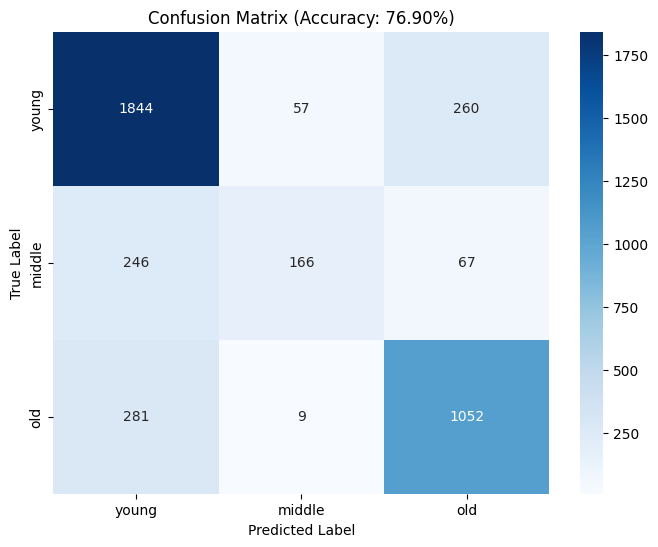

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluating the model on the testing set
test_predictions = model.predict(np.array(test_images))
predicted_labels = np.argmax(test_predictions, axis=1)

# Calculating accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)

# Creating a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Defining class labels
class_labels = ['young', 'middle', 'old']

# Plotting the confusion matrix with accuracy score in the title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Confusion Matrix (Accuracy: {accuracy*100:.2f}%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#Let's see the classification report
classification_rep = classification_report(test_labels, predicted_labels, target_names=class_labels)
print("Classification Report:\n", classification_rep)

# Show the figure
plt.show()


**Visualizing the training loss, testing loss, training accuracy and testing accuracy results through a line graph**

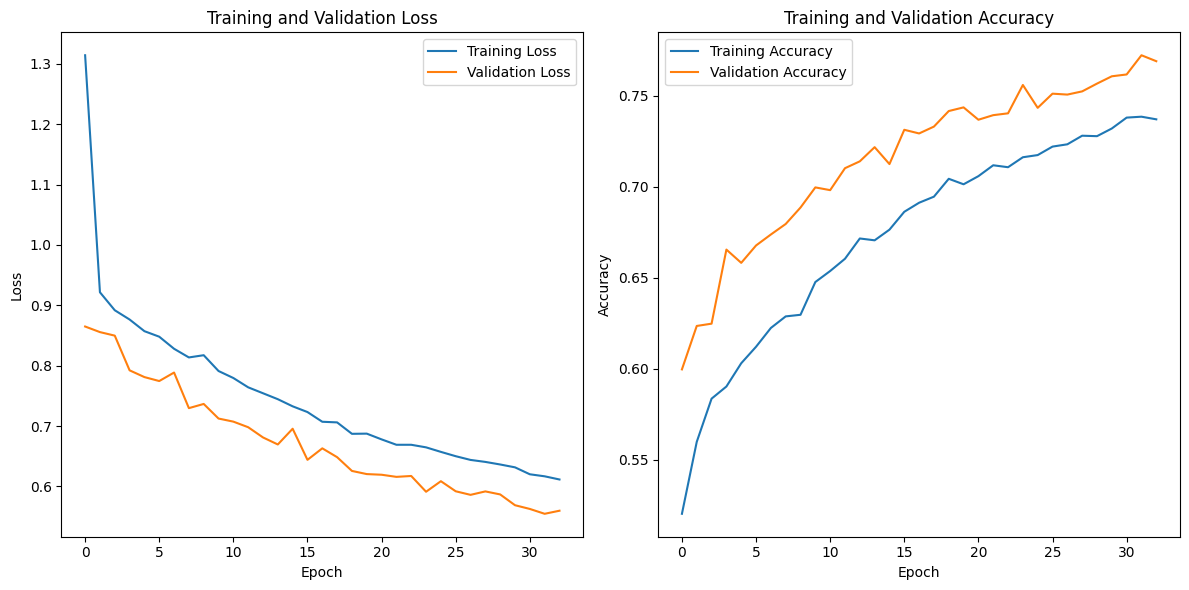

In [ ]:
import matplotlib.pyplot as plt

# Access training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#— Comparing All CNN Models
Creating a line graph to compare the accuracy levels of all CNN Models

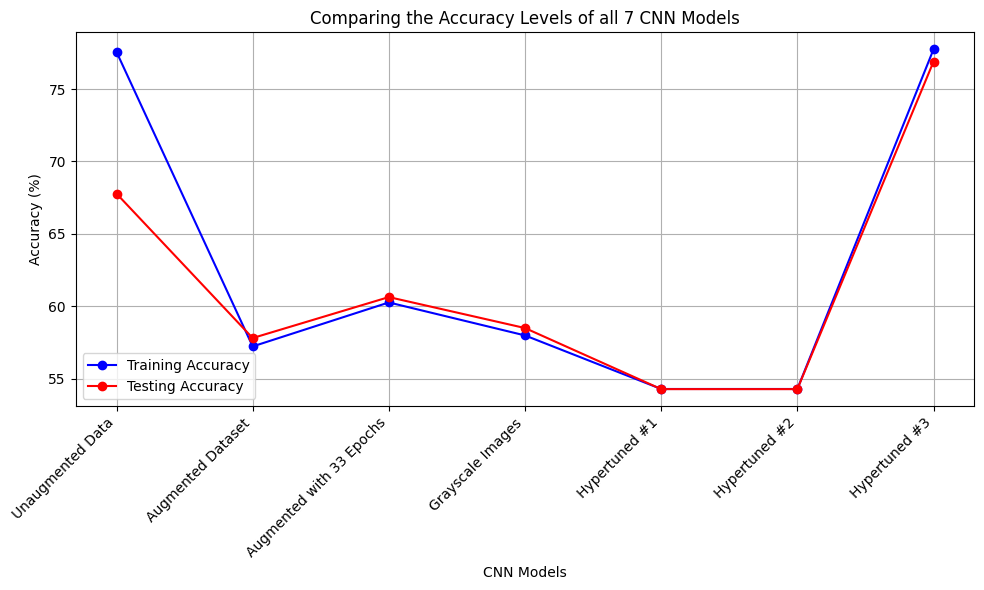

In [ ]:
import matplotlib.pyplot as plt

# Adding Data
models = ['Unaugmented Data', 'Augmented Dataset', 'Augmented with 33 Epochs', 'Grayscale Images', 'Hypertuned #1', 'Hypertuned #2', 'Hypertuned #3']
training_accuracy = [77.57, 57.22, 60.26, 57.98, 54.28, 54.28, 77.75]
testing_accuracy = [67.78, 57.80, 60.63, 58.49, 54.27, 54.27, 76.90]

# Plotting the figure
plt.figure(figsize=(10, 6))
plt.plot(models, training_accuracy, marker='o', label='Training Accuracy', linestyle='-', color='b')
plt.plot(models, testing_accuracy, marker='o', label='Testing Accuracy', linestyle='-', color='r')

# Adding labels and title
plt.xlabel('CNN Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparing the Accuracy Levels of all 7 CNN Models')
plt.legend()

# Displaying the graph
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#— Testing My Model [Making Predictions]

1. This program asks for an input image from the user, and then predicts it's age.

Enter the path to the image you want to test: Train/673.jpg
1/1 [==============================] - 0s 238ms/step


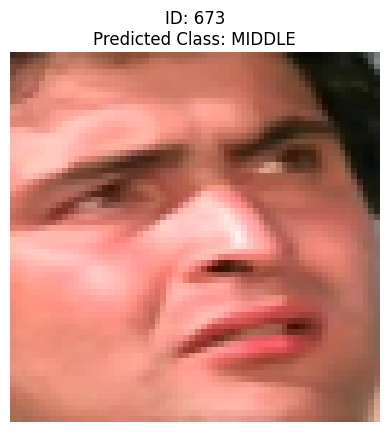

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image as PILImage
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Loading the trained model
trained_model = load_model('/content/age_prediction_model.h5')

# Preprocessing a single image for prediction
def preprocess_image(image_path):
    img_pil = PILImage.open(image_path)

    # Converting grayscale images to RGB as asked in assignment
    if img_pil.mode == 'L':
        img_pil = img_pil.convert('RGB')

    # Resizing the image
    img_pil = img_pil.resize((64, 64))

    # Converting the image to a NumPy array and rescaling pixel values
    img_array = np.array(img_pil) / 255.0

    # Reshaping the image array for prediction
    img_array = img_array.reshape((1,) + img_array.shape)

    return img_array, img_pil

# Ask the user for an image path
new_image_path = input("Enter the path to the image you want to test: ")

# Making predictions on the user-provided image
preprocessed_image, original_image = preprocess_image(new_image_path)

# Getting the predicted class probabilities
predictions = trained_model.predict(preprocessed_image)

# Getting the predicted class index
predicted_class_index = np.argmax(predictions)

# Inverting the encoding to get the class label
predicted_class_label = label_encoder.classes_[predicted_class_index]

# Displaying the original image with the prediction
plt.imshow(original_image)
plt.title(f"ID: {new_image_path.split('/')[-1].split('.')[0]}\nPredicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()


**Result: Correct!**

2. In this program we specify an image mentioning its path in the program itself, then predictions for age/class and ID are printed as a result.

1/1 [==============================] - 0s 84ms/step


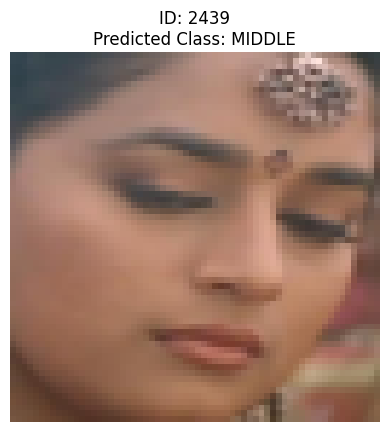

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image as PILImage
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Loading the trained model
trained_model = load_model('/content/age_prediction_model.h5')

# Preprocessing a single image for prediction
def preprocess_image(image_path):
    img_pil = PILImage.open(image_path)

    # Converting grayscale images to RGB
    if img_pil.mode == 'L':
        img_pil = img_pil.convert('RGB')

    # Resizing the image
    img_pil = img_pil.resize((64, 64))

    # Converting the image to a NumPy array
    img_array = np.array(img_pil) / 255.0

    # Reshaping the image array for prediction
    img_array = img_array.reshape((1,) + img_array.shape)

    return img_array, img_pil

# Making predictions on a new image
new_image_path = 'Train/2439.jpg'
image_id = os.path.splitext(os.path.basename(new_image_path))[0]  # Extracting ID from the path
preprocessed_image, original_image = preprocess_image(new_image_path)

# Predicting the class probabilities
predictions = trained_model.predict(preprocessed_image)

# Getting the predicted class index
predicted_class_index = np.argmax(predictions)

# Inverting the encoding to get the class label
predicted_class_label = label_encoder.classes_[predicted_class_index]

# Displaying the original image with ID and predicted class
plt.imshow(original_image)
plt.title(f"ID: {image_id}\nPredicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()


Result: Correct!

#— Accuracy Assessment

# #12. Anvil Algorithms

**Downloading My Model**

In [ ]:
from google.colab import files

#Generating a download link for the saved model file
files.download('/content/age_prediction_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=8d1fe4ed6d3f99f3b46d4684534a7435055d19c60c8bfd3efd5792b88277aa9e
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server

anvil.server.connect("server_V57MH52GVOIM67JECVETETV5-7BK56P2DR6TJ6VIU")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
import anvil.media
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np


@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as filename:
        img = load_img(filename)

        img = img.resize((64, 64))
        arr = img_to_array(img)
        arr = np.expand_dims(arr, axis=0)
        arr /= 255

        score = model.predict(arr)
        score = np.argmax(score)
        if score == 2:
          return 'Young'
        elif score == 1:
          return 'Old'
        elif score == 0:
          return 'Middle'
        else :
          return 'I cannot guess, sorry!'


